<a href="https://colab.research.google.com/github/shaharbanu-123/FINAL-Project/blob/main/project_26_07_2025_71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Setup & Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# CodeGrade Tag Init1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Load and Preprocess the Data**

In [3]:
# Load the csv
csv_loc = "/content/drive/MyDrive/cpcb_dly_aq_west_bengal-2010.csv"
df = pd.read_csv(csv_loc)

# Rename RSPM/PM10 column to PM10
df = df.rename(columns={'RSPM/PM10': 'PM10'})
# Rename Sampling Date to Date
df = df.rename(columns={'Sampling Date' : ' Date'})

df.head()



,Stn Code,Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,PM10,SPM
0,386,1/1/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,10.0,80.1,252.000000,525.0
1,386,1/3/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,10.6,84.1,248.000000,516.0
2,386,1/8/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,9.8,85.2,253.666667,527.0
3,386,1/12/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,9.2,77.6,255.333333,521.0
4,386,14-01-10,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,9.7,84.8,241.666667,511.0


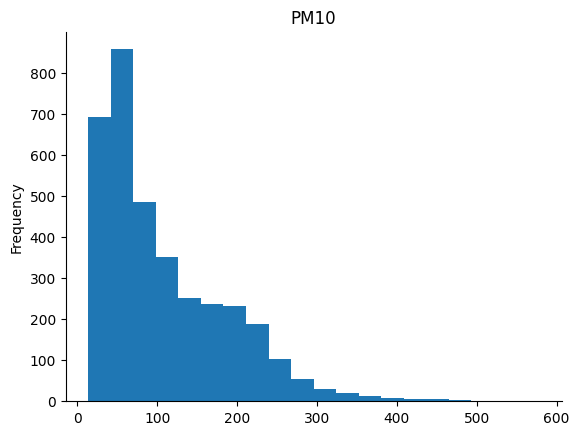

In [9]:
# @title PM10

from matplotlib import pyplot as plt
df['PM10'].plot(kind='hist', bins=20, title='PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

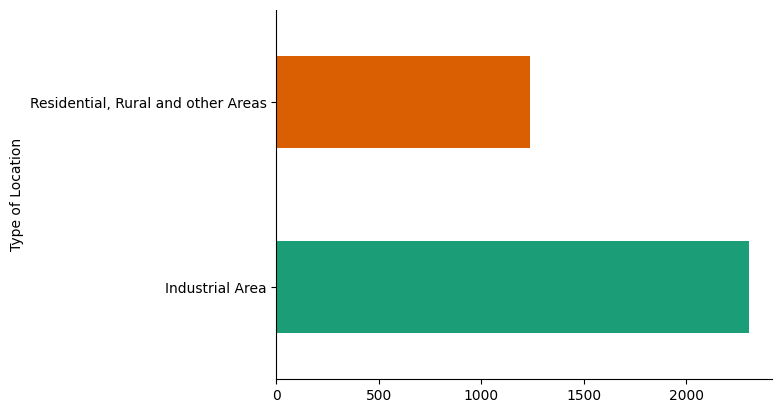

In [8]:
# @title Type of Location

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Type of Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

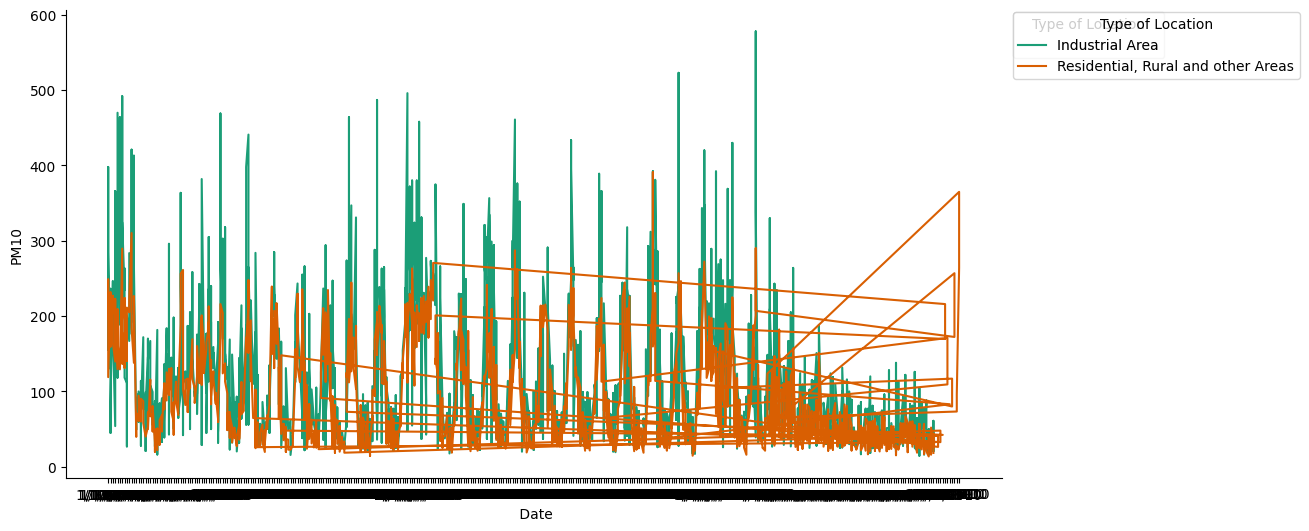

In [6]:
# @title  Date vs PM10

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Date']
  ys = series['PM10']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values(' Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Type of Location')):
  _plot_series(series, series_name, i)
  fig.legend(title='Type of Location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Date')
_ = plt.ylabel('PM10')

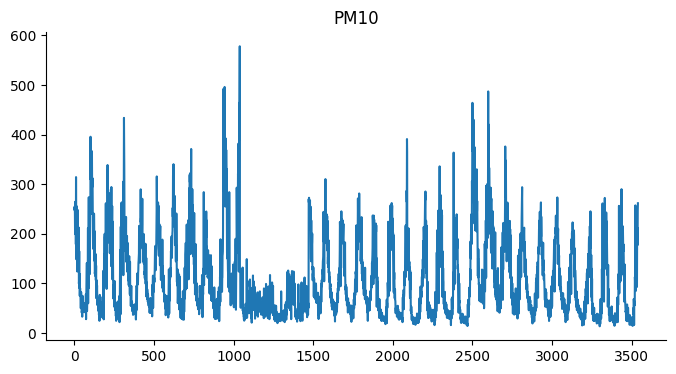

In [5]:
# @title PM10

from matplotlib import pyplot as plt
df['PM10'].plot(kind='line', figsize=(8, 4), title='PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

/tmp/ipython-input-4-2733122853.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='PM10', y='Type of Location', inner='box', palette='Dark2')


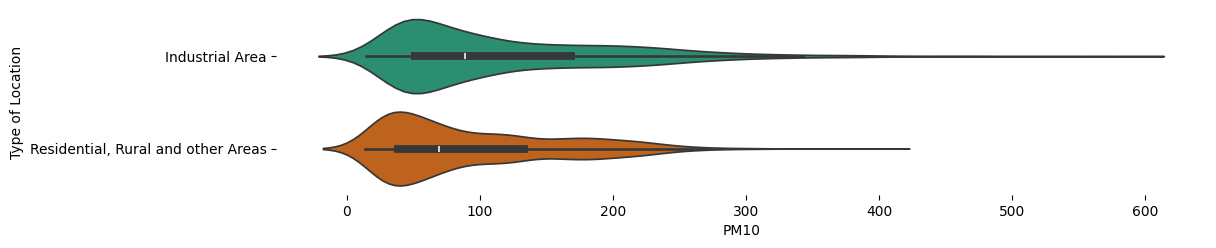

In [4]:
# @title Type of Location vs PM10

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Type of Location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='PM10', y='Type of Location', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [10]:
# Parse date column and sort
df[' Date'] = pd.to_datetime(df[' Date'], format='mixed', dayfirst=True, errors='coerce')

df = df.sort_values(' Date')

# Filter PM2.5 values for a selected location
city_df = df[df['City/Town/Village/Area'] == 'Kolkata'][[' Date', 'PM10']].dropna()

# Resample daily average if needed
city_df = city_df.set_index( ' Date').resample('D').mean()

df.head()
city_df.head()

,PM10
Date,
2010-01-01,155.000000
2010-01-02,193.833333
2010-01-03,133.000000
2010-01-04,76.333333
2010-01-05,30.666667


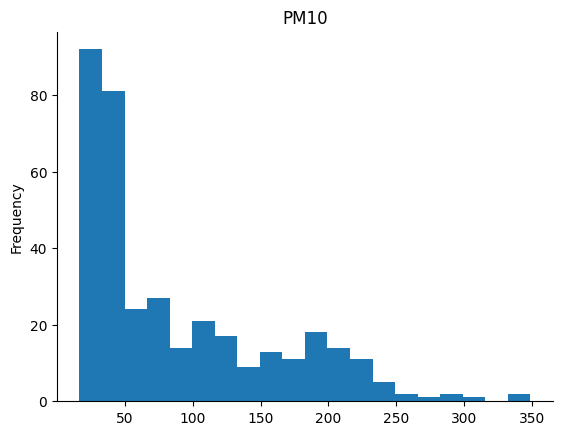

In [11]:
# @title PM10

from matplotlib import pyplot as plt
city_df['PM10'].plot(kind='hist', bins=20, title='PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

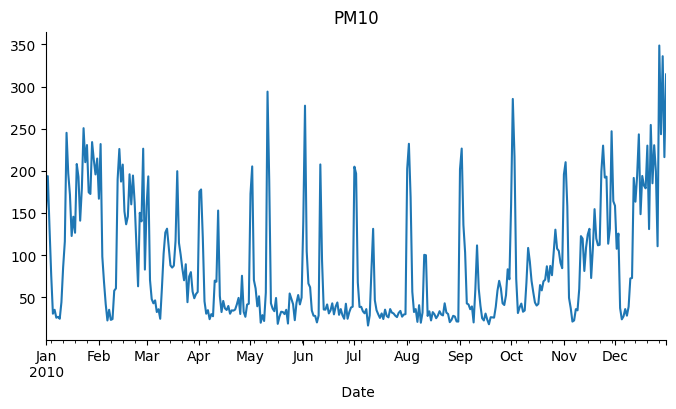

In [12]:
# @title PM10

from matplotlib import pyplot as plt
city_df['PM10'].plot(kind='line', figsize=(8, 4), title='PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

# **3.Heat Map for Daily PM10 Levels in Kolkata**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extract month for grouping
df['Day'] = df[' Date'].dt.day
df['Month'] = df[' Date'].dt.strftime('%b')
df['Month_Num'] = df[' Date'].dt.month  # to sort months later


In [14]:
# Group by month and day, then get average PM10
pivot_df = df.groupby(['Month_Num', 'Month', 'Day'])['PM10'].mean().reset_index()

# Pivot table: rows = day, columns = month
heatmap_data = pivot_df.pivot(index='Day', columns='Month', values='PM10')

# Sort months in calendar order
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
heatmap_data = heatmap_data[month_order]


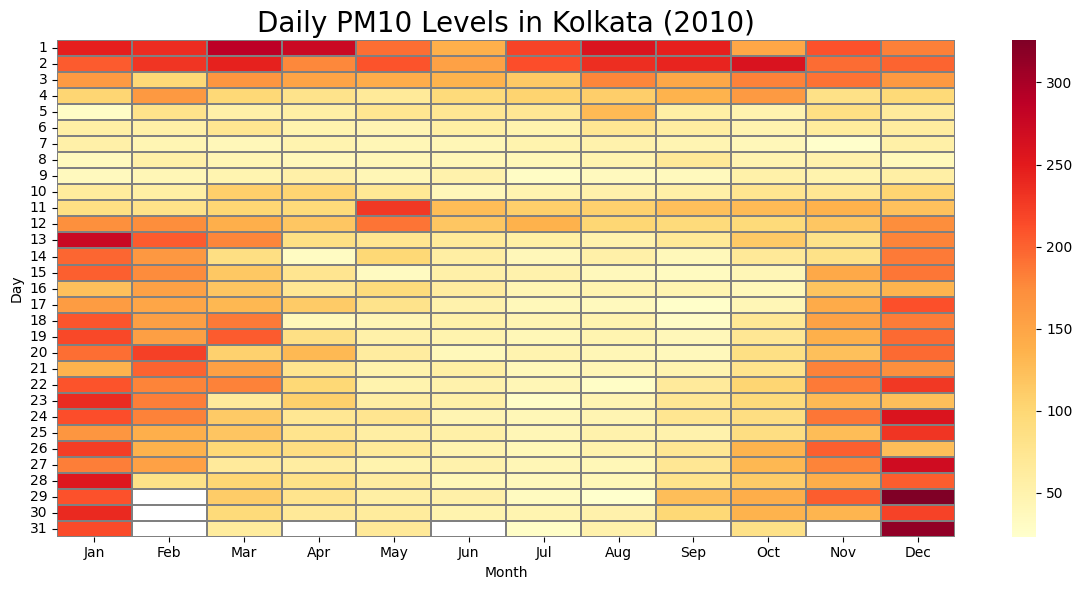

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.3, linecolor='gray', annot=False)
plt.title('Daily PM10 Levels in Kolkata (2010)', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Day')
plt.tight_layout()
plt.show()



# **4.LSTM Forecasting**

## **1.Scale Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaling PM10 values
scaler = MinMaxScaler()
city_df['PM10_scaled'] = scaler.fit_transform(city_df[['PM10']])

## **2.Create sequences**

In [ ]:
# Creating Sequences for Supervised Learning
def create_sequences(data, lookback=30):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

import numpy as np
pm10_values = city_df['PM10_scaled'].values
X, y = create_sequences(pm10_values, lookback=30)

## **3.Train-test split**

In [ ]:
# Split into Train-Test (e.g., 80-20 split)
split = -50
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f'Training samples: {X_train.shape[0]} | Test samples: {X_test.shape[0]}')

Training samples: 285 | Test samples: 50


## **4. LSTM Forcasting**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


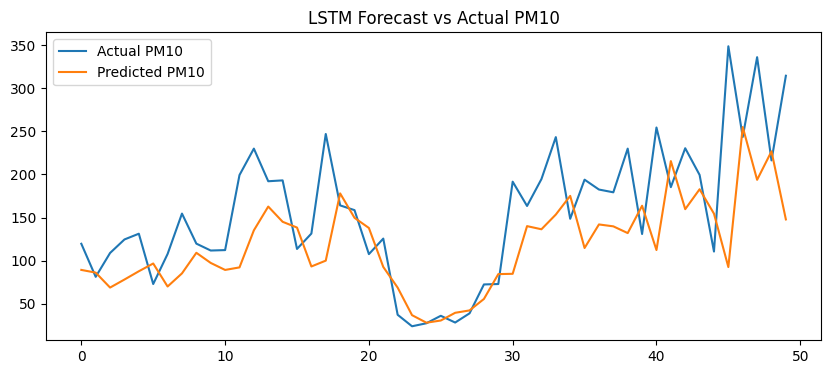

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reshape input for LSTM: (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test_lstm, y_test), verbose=0)

# Predict
y_pred_scaled = model.predict(X_test_lstm).flatten()

# Inverse Scale to get original PM10 values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_actual = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Optional: Plot Actual vs. Predicted
plt.figure(figsize=(10,4))
plt.plot(y_test_actual, label='Actual PM10')
plt.plot(y_pred_actual, label='Predicted PM10')
plt.legend()
plt.title('LSTM Forecast vs Actual PM10')
plt.show()


## **5. Function to evaluate models**

In [ ]:
def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mape = (np.abs((y_true - y_pred) / y_true)).mean() * 100
    r2 = r2_score(y_true, y_pred)
    accuracy = 100 - mape

    print('--- Evaluation Metrics ---')
    print(f'MAE    : {mae:.3f}')
    print(f'MSE    : {mse:.3f}')
    print(f'RMSE   : {rmse:.3f}')
    print(f'MAPE   : {mape:.3f}%')
    print(f'R²     : {r2:.3f}')
    print(f'Forecasting Accuracy : {accuracy:.3f}%')

    return mae, mse, rmse, mape, r2, accuracy


## **6.Residual Plotting**

In [ ]:
#Plot Residual
def plot_residuals(true, pred, label='Model'):
    residuals = true.flatten() - pred.flatten()
    plt.figure(figsize=(10, 4))
    plt.plot(residuals, label=f'{label} Residuals')
    plt.axhline(0, linestyle='--', color='black')
    plt.title(f'Residual Plot - {label}')
    plt.legend()
    plt.show()

## **7.Evatuation Metrics**

--- Evaluation Metrics ---
MAE    : 49.952
MSE    : 5036.499
RMSE   : 70.968
MAPE   : 29.729%
R²     : 0.162
Forecasting Accuracy : 70.271%


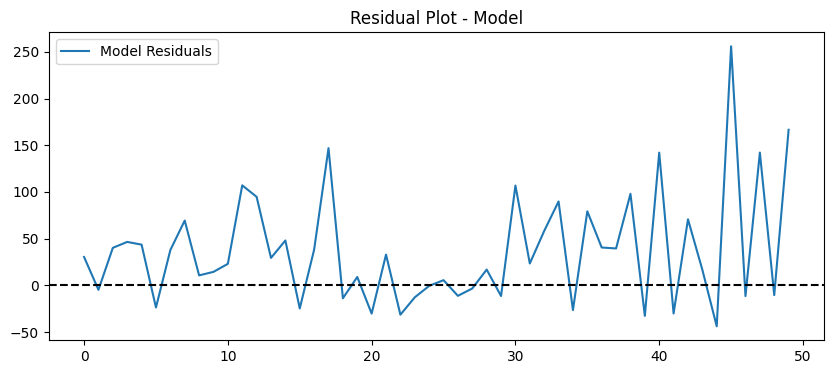

In [ ]:
# Evaluate LSTM
lstm_mae, lstm_mse, lstm_rmse, lstm_mape, lstm_r2, lstm_accuracy = evaluate_forecast(y_test_actual, y_pred_actual)
plot_residuals(y_test_actual, y_pred_actual)

## **8.Accuracy Table**

In [ ]:
# Metrics and Accuracy table

import pandas as pd

metrics_df = pd.DataFrame({
    'Model': ['LSTM'],
    'RMSE': [ lstm_rmse],
    'MAE': [ lstm_mae],
    'MAPE (%)': [ lstm_mape],
    'R²': [lstm_r2],
    'Forecast Accuracy (%)': [lstm_accuracy]
    })

metrics_df.set_index('Model', inplace=True)
metrics_df.style.background_gradient(cmap='RdYlGn_r').format("{:.2f}")


,RMSE,MAE,MAPE (%),R²,Forecast Accuracy (%)
Model,,,,,
LSTM,70.97,49.95,29.73,0.16,70.27
